In [1]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '240120_2145_3line_100ms22C'
filename = 'myData/'+data+'.csv'
Infer = pd.read_csv(filename)
Infer=Infer.iloc[:,:6]
Infer.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05
count,240782.000000,240782.000000,240782.000000,240782.000000,240782.000000,240782.000000
mean,70.475232,69.494753,62.966289,65.463472,59.045660,65.117357
std,1.096122,1.122799,1.003216,0.760391,0.966272,1.048458
min,55.330000,57.320000,47.790000,55.770000,47.430000,52.210000
25%,69.960000,68.920000,62.410000,65.020000,58.570000,64.630000
50%,70.550000,69.560000,63.020000,65.480000,59.120000,65.220000
75%,71.120000,70.200000,63.580000,65.940000,59.630000,65.750000
max,74.030000,73.780000,68.430000,68.810000,64.080000,70.970000


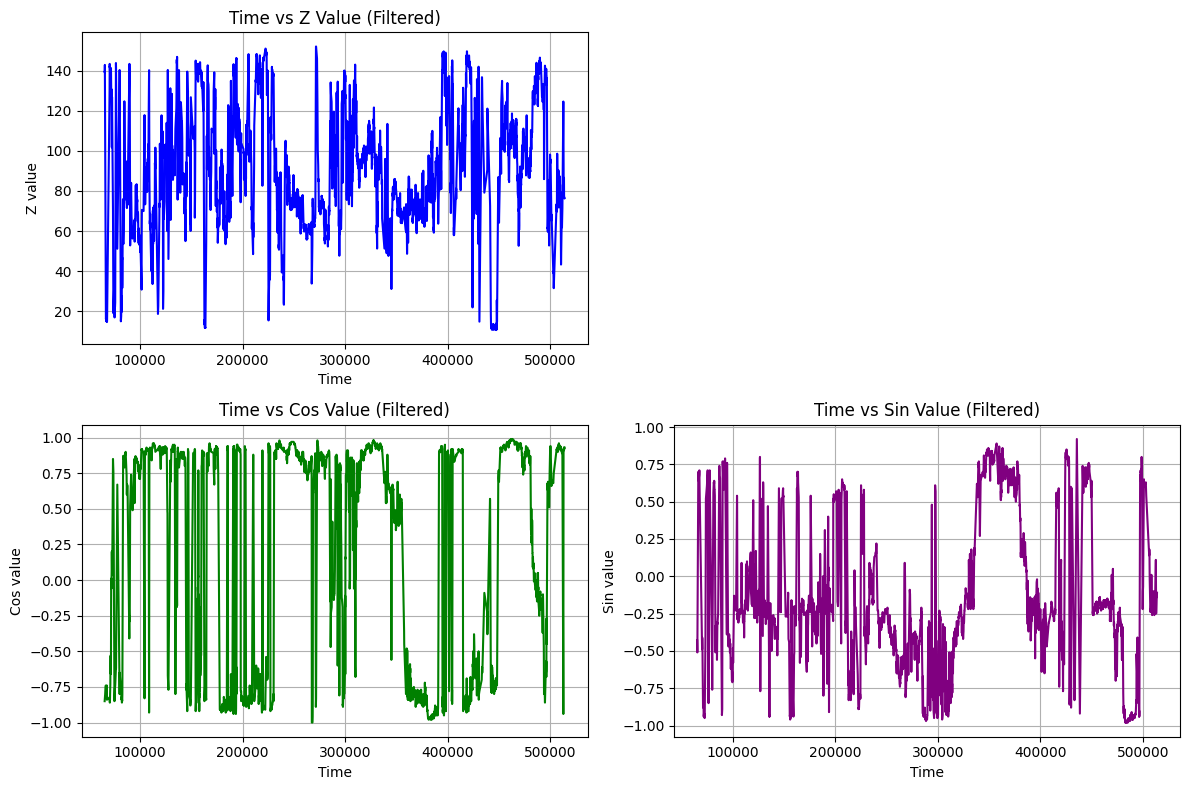

In [16]:
# Plotting
fig = plt.figure(figsize=(12, 8))

# Plot for z values
plt.subplot(2, 2, 1)
plt.plot(Infer['time'], Infer['z'], label='Z value', color='blue')
plt.xlabel('Time')
plt.ylabel('Z value')
plt.title('Time vs Z Value (Filtered)')
plt.grid(True)

# Plot for force values
#plt.subplot(2, 2, 2)
#plt.plot(Infer['time'], Infer['force'], label='Force value', color='red')
#plt.xlabel('Time')
#plt.ylabel('Force value')
#plt.title('Time vs Force Value (Filtered)')
#plt.grid(True)

# Plot for cos values
plt.subplot(2, 2, 3)
plt.plot(Infer['time'], Infer['cos'], label='Cos value', color='green')
plt.xlabel('Time')
plt.ylabel('Cos value')
plt.title('Time vs Cos Value (Filtered)')
plt.grid(True)

# Plot for sin values
plt.subplot(2, 2, 4)
plt.plot(Infer['time'], Infer['sin'], label='Sin value', color='purple')
plt.xlabel('Time')
plt.ylabel('Sin value')
plt.title('Time vs Sin Value (Filtered)')
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('D:\\ME program\\2017-PhD\\01_research\\02Study\\34_ballon_like_cover\\DeepLearing\\TACTS\\TACTS_v3\\myLearningData\\savefig\\3line\\LargeData\\Infer\\'+data+'_four_plot.png')



    force       z   cos   sin  sqsum   time
0      50  139.37 -0.85 -0.43   0.91  65482
1      50  139.08 -0.84 -0.46   0.92  65586
2      50  142.82 -0.83 -0.51   0.95  65690
10     50   15.29 -0.82  0.60   1.02  67848
11     50  130.30 -0.84 -0.49   0.95  70298


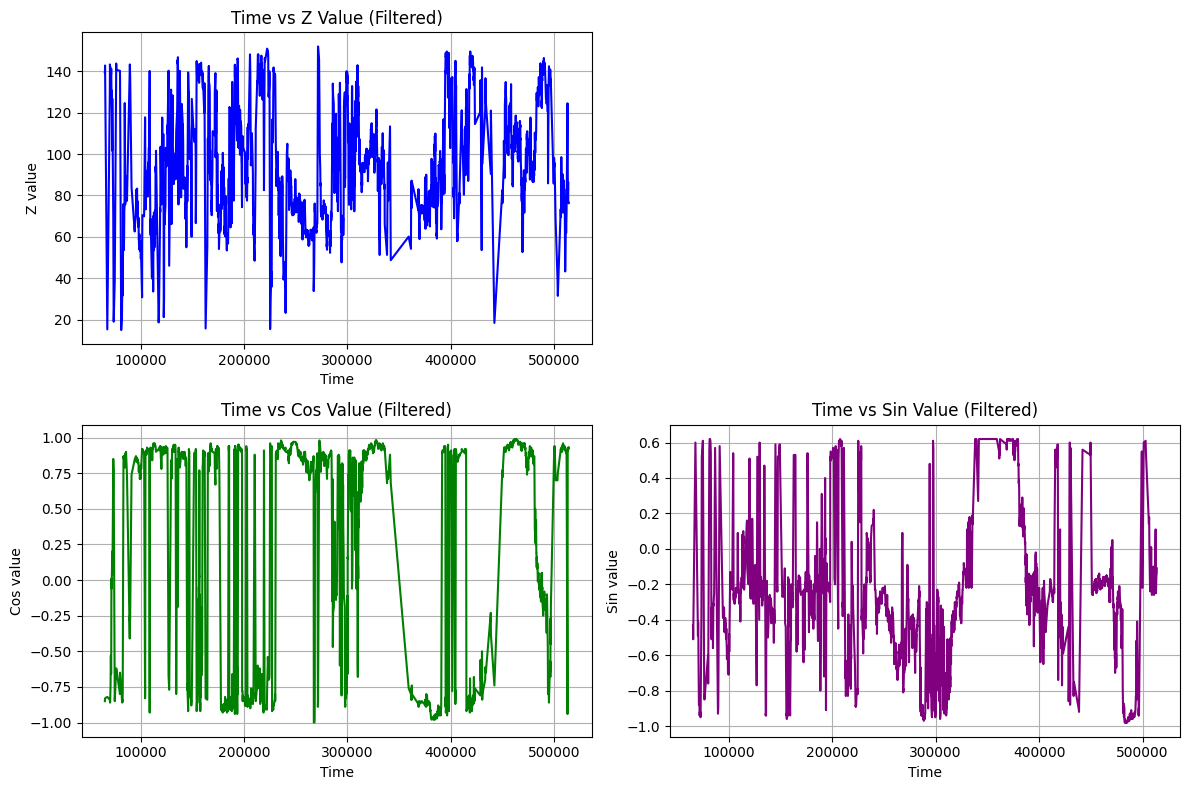

In [17]:
# Testing the provided code to identify the issue

# Redefining the remove_outliers function
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Applying the function to the original data
data_filtered = remove_outliers(Infer, 'z')
data_filtered = remove_outliers(data_filtered, 'force')
data_filtered = remove_outliers(data_filtered, 'cos')
data_filtered = remove_outliers(data_filtered, 'sin')

# Verifying the filtered data
print(data_filtered.head())

# Plotting
fig = plt.figure(figsize=(12, 8))

# Plot for z values
plt.subplot(2, 2, 1)
plt.plot(data_filtered['time'], data_filtered['z'], label='Z value', color='blue')
plt.xlabel('Time')
plt.ylabel('Z value')
plt.title('Time vs Z Value (Filtered)')
plt.grid(True)

# Plot for force values
#plt.subplot(2, 2, 2)
#plt.plot(data_filtered['time'], data_filtered['force'], label='Force value', color='red')
#plt.xlabel('Time')
#plt.ylabel('Force value')
#plt.title('Time vs Force Value (Filtered)')
#plt.grid(True)

# Plot for cos values
plt.subplot(2, 2, 3)
plt.plot(data_filtered['time'], data_filtered['cos'], label='Cos value', color='green')
plt.xlabel('Time')
plt.ylabel('Cos value')
plt.title('Time vs Cos Value (Filtered)')
plt.grid(True)

# Plot for sin values
plt.subplot(2, 2, 4)
plt.plot(data_filtered['time'], data_filtered['sin'], label='Sin value', color='purple')
plt.xlabel('Time')
plt.ylabel('Sin value')
plt.title('Time vs Sin Value (Filtered)')
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('D:\\ME program\\2017-PhD\\01_research\\02Study\\34_ballon_like_cover\\DeepLearing\\TACTS\\TACTS_v3\\myLearningData\\savefig\\3line\\LargeData\\Infer\\'+data+'_four_plot.png')



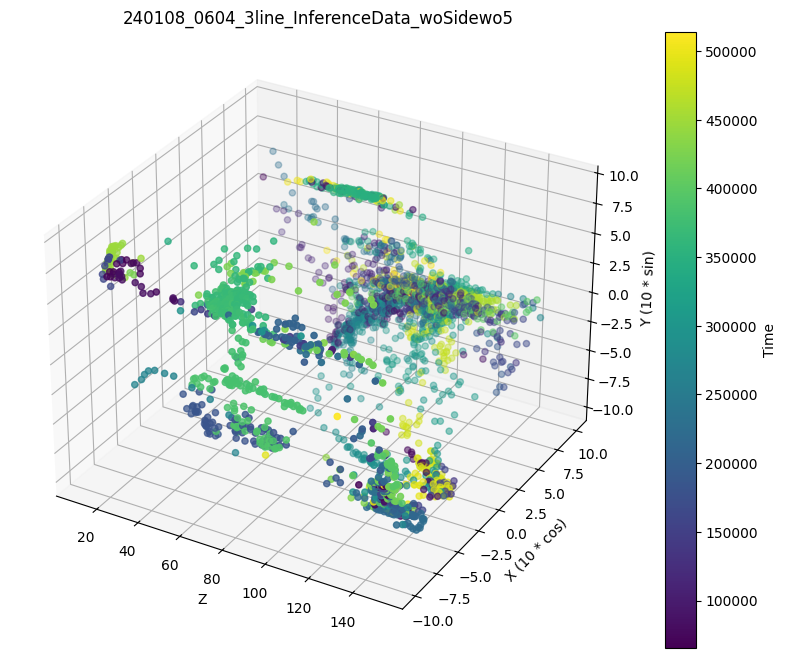

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Prepare the filtered data for 3D scatter plot with the specified radius
y_scatter_filtered = 10 * Infer['cos']
z_scatter_filtered = 10 * Infer['sin']
x_scatter_filtered = Infer['z']

# Create a 3D scatter plot using the filtered data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with time as color and viridis color map
scatter = ax.scatter(x_scatter_filtered, y_scatter_filtered, z_scatter_filtered, c=Infer['time'], cmap='viridis')

# Adding labels and title
ax.set_xlabel('Z')
ax.set_ylabel('X (10 * cos)')
ax.set_zlabel('Y (10 * sin)')
plt.title(data)  # Replace 'Your Title Here' with your desired title
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Time')

# Show the plot
plt.show()

# Save the figure
fig.savefig('D:\\ME program\\2017-PhD\\01_research\\02Study\\34_ballon_like_cover\\DeepLearing\\TACTS\\TACTS_v3\\myLearningData\\savefig\\3line\\LargeData\\Infer\\' + data+'.png')


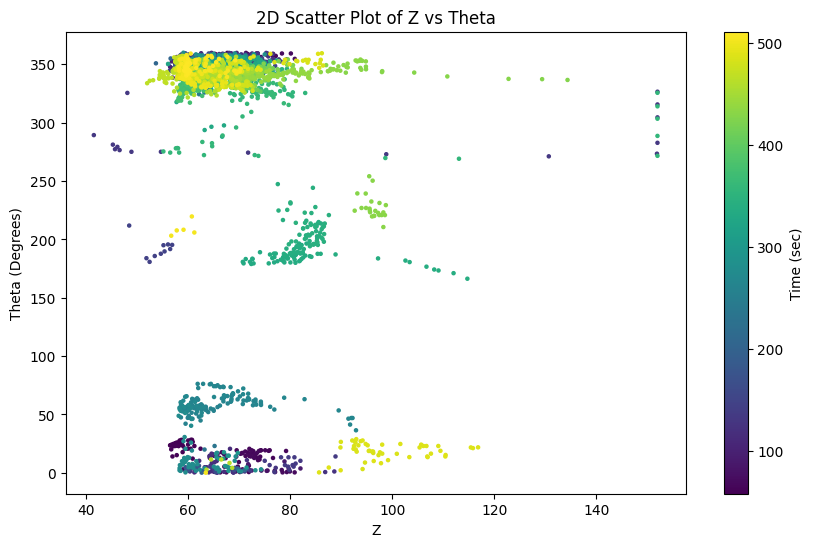

In [13]:
import numpy as np
# Calculate the angles using atan2, converting from radians to degrees
Infer['theta'] = np.degrees(np.arctan2(Infer['sin'], Infer['cos']))

# Adjusting theta values to be between 0 and 360 degrees
Infer['theta'] = (Infer['theta']+120) % 360

# Create a 2D scatter plot with 'z' on the x-axis and 'theta' on the y-axis
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(Infer['z'], Infer['theta'], c=Infer['time']/1000, cmap='viridis',s=5)

# Adding labels and title
plt.xlabel('Z')
plt.ylabel('Theta (Degrees)')
plt.title('2D Scatter Plot of Z vs Theta')

# Show the plot
plt.colorbar(label='Time (sec)')
plt.show()
